<a href="https://colab.research.google.com/github/EderRobins/Google-colab-/blob/main/Tensors_crash_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [10]:
import torch
#tensors

#empty tensor
x = torch.empty(2,3)
print(x)

x = torch.rand(2,2)
print(x)

x = torch.zeros(2,2)
print(x)

x = torch.ones(2,2, dtype=torch.float16)
print(x)
print(x.dtype)
print(x.size())

x = torch.tensor([2.5,0.1])
print(x)

x = torch.rand(2,2)
y = torch.rand(2,2)

#add tensors
z=x+y
z =torch.add(x,y)
print(z)

#implace operations
y.add_(x)

#subtraction
z = x - y
z = torch.sub(x,y)
print(z)

#multiplication
z = x * y
z = torch.mul(x,y)
print(z)

#div
z = x / y
z = torch.div(x,y)
print(z)

#slicing
x = torch.rand(5,3)
print(x)
print(x[1,:])

#resize
x = torch.rand(4,4)
y = x.view(16)
print(y)

if torch.cuda.is_available():
  device=torch.device("cuda")
  x = torch.ones(5,device=device)
  y = torch.ones(5)
  y = y.to(device)
  z = x + y
  z = z.to("cpu")

x = torch.ones(5, requires_grad=True)

tensor([[1.7874e-35, 0.0000e+00, 1.1060e-35],
        [0.0000e+00, 3.3631e-44, 1.4013e-45]])
tensor([[0.6833, 0.3746],
        [0.7534, 0.3651]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
torch.float16
torch.Size([2, 2])
tensor([2.5000, 0.1000])
tensor([[0.9062, 0.9611],
        [1.0476, 0.7473]])
tensor([[-0.6862, -0.3956],
        [-0.4183, -0.3512]])
tensor([[0.1995, 0.5436],
        [0.6592, 0.2960]])
tensor([[0.2429, 0.5884],
        [0.6007, 0.5301]])
tensor([[0.9020, 0.6056, 0.3298],
        [0.8687, 0.6405, 0.0332],
        [0.5732, 0.6301, 0.2479],
        [0.6827, 0.8231, 0.7197],
        [0.9381, 0.1263, 0.0527]])
tensor([0.8687, 0.6405, 0.0332])
tensor([0.0873, 0.7982, 0.6715, 0.9889, 0.8153, 0.2617, 0.6656, 0.2485, 0.5782,
        0.9252, 0.0170, 0.7588, 0.5331, 0.8778, 0.4800, 0.4099])


In [2]:
#linear module
import torch

w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def forward(x):
  y = w*x+b
  return y

x = torch.tensor([[4],[7]])
forward(x)


tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [8]:
import torch
from torch.nn import Linear

torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias,model.weight)

x = torch.tensor([[2.0],[3.3]])
print(model(x))


Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)
tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [1]:
import torch
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self,x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))
x = torch.tensor([[1.0],[2.0]])
print(model.forward(x))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


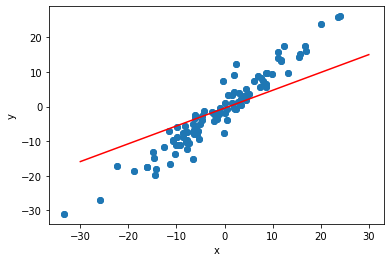

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

x = torch.randn(100,1) * 10
y  =x + 3* torch.randn(100,1)
plt.plot(x.numpy(), y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self,x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1,1)
[w,b] = model.parameters()
def get_params():
  return {w[0][0].item(),b[0].item()}

def plot_fit(title):
  plt.title = title
  w1,b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1 * x1 + b1
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()

plot_fit('Initial model')